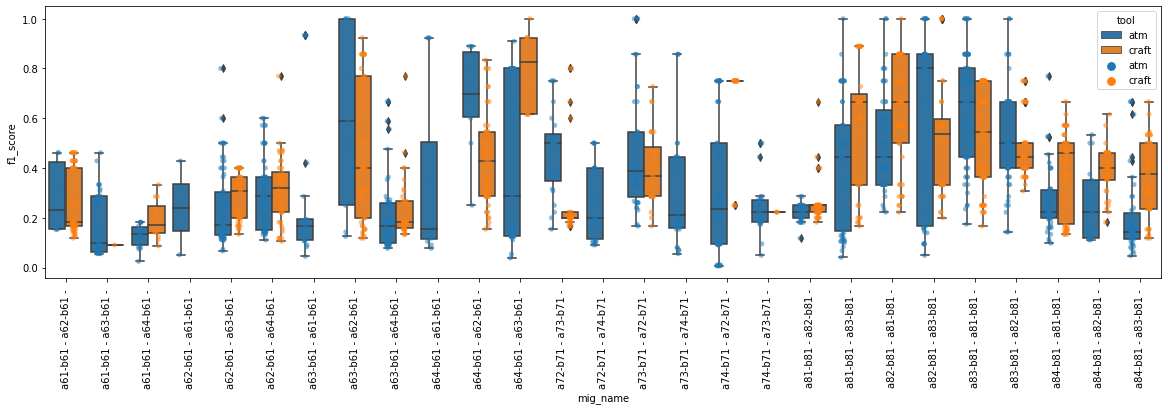

In [8]:
import re
from os import listdir

import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn


def get_concat_result(path):
    results_fname = [ f for f in listdir(path) if '.csv' in f]
    all_results = []
    for fname in results_fname:
        result_f = pd.read_csv(path + fname)
        result_f['config'] = fname.replace('result_', '')
        all_results.append(result_f)

    all_results_df = pd.concat(all_results)
    all_results_df = all_results_df[['src_app', 'target_app', 'f1_score']]
    return all_results_df.sort_values(by=['src_app','target_app'])

def describe_f1_per_migration(all_results_df, save_path):
    groups_by = ['src_app', 'target_app']
    grouped_results = all_results_df.groupby(by=groups_by)
    group_desc = grouped_results['f1_score'].describe()
    group_desc.to_csv(save_path)

def creat_box_plots(df, column, save_path):
    plt.clf()
    plt.close()
    plt.figure(figsize=(20, 5))
    if 'task' not in df.columns:
        df['task'] = ''
    df['mig_name'] = df['src_app']+ ' - ' + df['target_app']+ ' - ' + df['task']

    ax = sn.boxplot(data = df, y = column , x = 'mig_name')
    ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
    sn.stripplot(data = df, y = column , x = 'mig_name', jitter=True,
                 dodge=True,
                 marker='o',
                 alpha=0.5)
    plt.savefig(save_path, bbox_inches= 'tight')

def get_tool_type(x):
    return 'craft' if bool(re.search('a[6-8]', x['src_app'])) else 'atm'


def rename_subjects(x):
    res = x['mig_name'].replace('ExpenseTracker1','a61-b61')
    res = res.replace('ExpenseTracker2','a62-b61')
    res = res.replace('ExpenseTracker3','a63-b61')
    res = res.replace('ExpenseTracker4','a64-b61')

    res = res.replace('NoteTaking2','a72-b71')
    res = res.replace('NoteTaking3','a73-b71')
    res = res.replace('NoteTaking4','a74-b71')


    res = res.replace('ShoppingList1','a81-b81')
    res = res.replace('ShoppingList2','a82-b81')
    res = res.replace('ShoppingList3','a83-b81')
    res = res.replace('ShoppingList4','a84-b81')


    return res

def creat_box_plots2(df, column, save_path):
    plt.clf()
    plt.close()
    plt.figure(figsize=(20, 5))
    if 'task' not in df.columns:
        df['task'] = ''
    df['mig_name'] = df['src_app']+ ' - ' + df['target_app']+ ' - ' + df['task']
    df['tool'] = ''
    df['tool'] = df.apply(get_tool_type, axis=1)
    df['mig_name'] = df.apply(rename_subjects, axis=1)
    ax = sn.boxplot(data = df, y = column , x = 'mig_name', hue='tool')

    ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
    sn.stripplot(data = df, y = column , x = 'mig_name', hue='tool', jitter=True,
                 dodge=True,
                 marker='o',
                 alpha=0.5)
    plt.savefig(save_path, bbox_inches= 'tight')


path = '../data/output/evaluation/atm/oracles_excluded/'
atm_df = get_concat_result(path)
# describe_f1_per_migration(atm_df,'f1_range/table/atm.csv')
# creat_box_plots(atm_df, 'f1_score', 'f1_range/plots/atm_f1_range.pdf')

path = '../data/output/evaluation/craftdroid/oracles_excluded/'
all_results_df = get_concat_result(path)
# describe_f1_per_migration(all_results_df,'f1_range/table/craft_all.csv')
# creat_box_plots(all_results_df, 'f1_score', 'f1_range/plots/craft_all_f1_range.pdf')

#
craft_craft_df = all_results_df[~all_results_df['src_app'].str.contains('a6|a7|a8')]
# describe_f1_per_migration(craft_craft_df,'f1_range/table/craft_craft.csv')
# creat_box_plots(craft_craft_df, 'f1_score', 'f1_range/plots/craft_craft_f1_range.pdf')
#
#
craft_atm_df = all_results_df[all_results_df['src_app'].str.contains('a6|a7|a8')]
# describe_f1_per_migration(craft_atm_df,'f1_range/table/craft_atm.csv')
# creat_box_plots(craft_atm_df, 'f1_score', 'f1_range/plots/craft_atm_f1_range.pdf')

side_by_side_df = pd.concat([atm_df, craft_atm_df])
creat_box_plots2(side_by_side_df, 'f1_score', 'f1_range/plots/craft_sbs_f1_range.pdf')